# <center><font color='purple' face='Times new roman' size="10">Salary Prediction</font></center>


<br><b>Name: Anup R Mallah</b> </br>
<br><b>Project of ShapeAI </b></br>
<br><b>Title: Salary Prediction </b></br>



<b>Problem on Hand: </b> Given a data set which  captures gross salary from July 1, 2013 through June 30, 2014 and includes only those employees who were employed on June 30, 2014 Predict the Salaries for Employees in Baltimore</b>

<b>
</b>

In [1]:
#Python libraries for Analysis
import numpy as np
import pandas as pd

#Python libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Dataset
salary_org = pd.read_csv("Dataset.csv")

#Printing the dataset
salary_org

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [3]:
#For getting normal information about the data
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [4]:
#Creating a copy of dataset
salary_cpy= salary_org.copy()

In [5]:
#To check whether the copy is same or not 
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

<b><font size= "5" color="Dark Blue">Data cleaning</b>

From the above data we get to know that there are null values in some columns


In [6]:
#To check Null values in a dataset
salary_cpy.isnull()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
18976,False,False,False,False,False,False,True
18977,False,False,False,False,False,False,True
18978,False,False,False,False,False,False,False
18979,False,False,False,False,False,False,False


In [7]:
#To check how many null values are present
salary_cpy.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [8]:
#To remove null values from Hiredate
salary_cpy = salary_cpy.dropna(subset=["HireDate"])

#To remove null values from AnnualSalary
salary_cpy= salary_cpy.dropna(subset=["GrossPay"])

salary_cpy.isnull().sum()

 Name           0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
GrossPay        0
dtype: int64

<b><Font size= "4" color= "Blue"> Value Counts</b>

In [9]:
#Value counts for AgencyID
salary_cpy.AgencyID.value_counts()

C90786    276
P04001    203
P04002    168
A99416    158
A50209    125
         ... 
W02606      1
W02679      1
W02440      1
A75041      1
A65021      1
Name: AgencyID, Length: 1096, dtype: int64

In [10]:
#Value counts for Agency
salary_cpy.Agency.value_counts()

Police Department           3133
Youth Summer                1688
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       825
                            ... 
Legislative Reference          5
Council Services               5
M-R Cable & Comm               4
Special City Services          4
HLTH-Health Dept Locatio       1
Name: Agency, Length: 65, dtype: int64

In [11]:
#Value counts for HireDate
salary_cpy.HireDate.value_counts()

06/10/2013    696
06/12/2012    375
06/07/2011    232
06/13/2013    134
06/03/2010    120
             ... 
04/14/1969      1
09/29/2001      1
06/14/1977      1
07/08/1985      1
01/18/1994      1
Name: HireDate, Length: 4710, dtype: int64

In [12]:
#Value counts for JobTitle
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                   1868
POLICE OFFICER                   1866
LABORER (Hourly)                  597
EMT Firefighter Suppression       358
CROSSING GUARD                    337
                                 ... 
ENVIRONMENTAL POLICY ANALYST        1
CHIEF CONTRACT OFFICER              1
TRAINING OFFICER II                 1
OFFICE MANAGER SAO                  1
VOLUNTEER SERVICE COORDINATOR       1
Name: JobTitle, Length: 1068, dtype: int64

In [13]:
#Value counts for AnnualSalary
salary_cpy.AnnualSalary.value_counts()

$11310.00    1864
$20800.00     247
$29245.00     196
$44773.00     162
$43999.00     162
             ... 
$77300.00       1
$34798.00       1
$81795.00       1
$82300.00       1
$43247.13       1
Name: AnnualSalary, Length: 1574, dtype: int64

In [14]:
# Removing $ from Annual Salary and converting it into Integer format because we have to visualize it later
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [15]:
salary_cpy.AnnualSalary.value_counts()

11310.0     1864
20800.0      247
29245.0      196
44773.0      162
43999.0      162
            ... 
18928.0        1
100436.0       1
33072.0        1
76113.0        1
77800.0        1
Name: AnnualSalary, Length: 1574, dtype: int64

In [16]:
#To get normal insights from data
salary_cpy.AnnualSalary.describe()

count     15688.000000
mean      45261.957569
std       23923.291351
min         900.000000
25%       29245.000000
50%       43760.000000
75%       63570.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

## <font color='Magenta' face='Cursive'>Exploratory Data Analysis and Data Visualization</font>

C:\Users\Anup\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


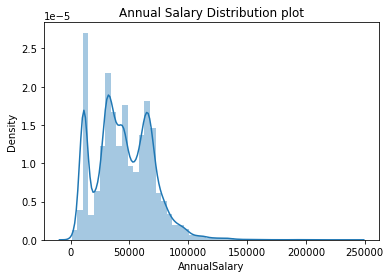

In [17]:
#Distribution plot using Seaborn
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary Distribution plot")
plt.show()

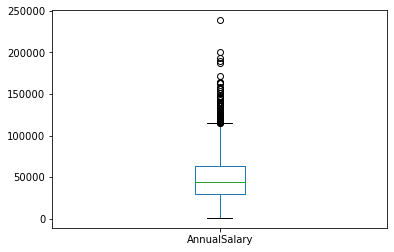

In [18]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

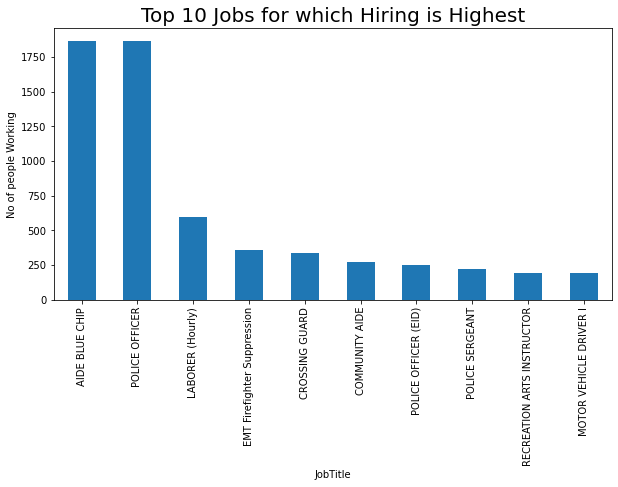

In [19]:
#Top 10 Jobs that based on hirings
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])[' Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=20)
plt.show()

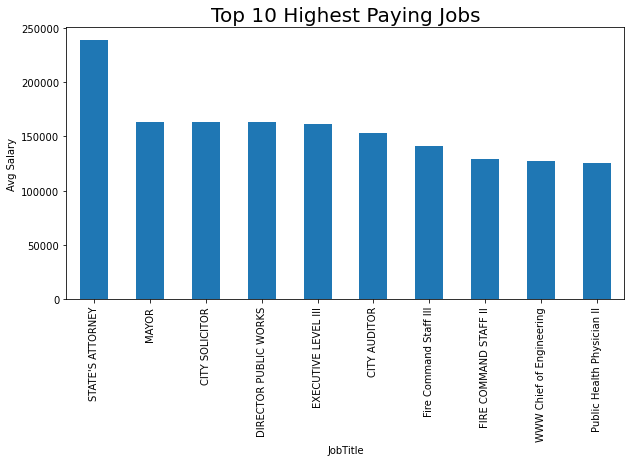

In [20]:
#Top 10 Jobs that fetch highest Salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title("Top 10 Highest Paying Jobs",fontsize=20)
plt.show()

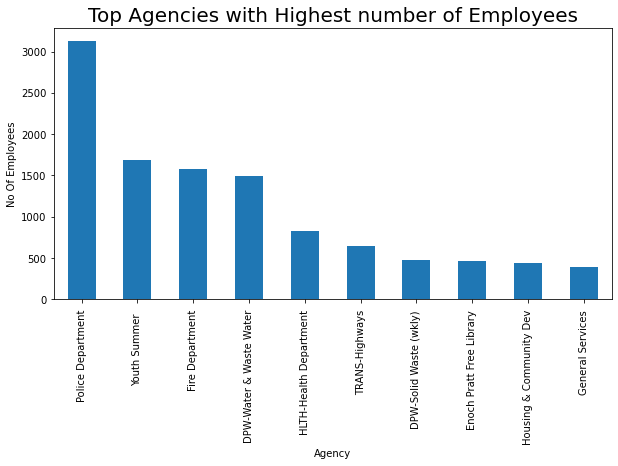

In [21]:
#Top 10 Agencies that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])[' Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=20)
plt.show()

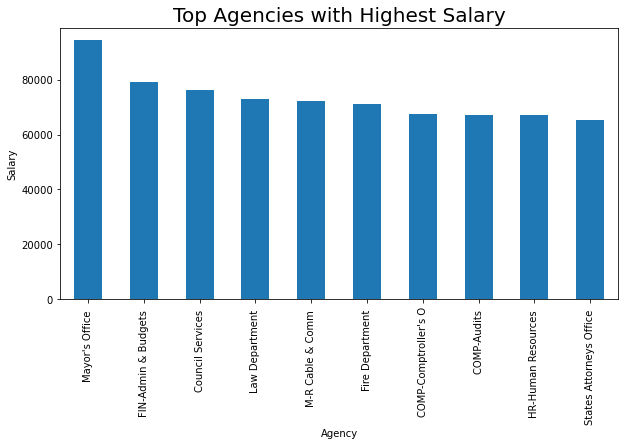

In [22]:
#Top 10 Agencies that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Salary')
plt.title("Top Agencies with Highest Salary",fontsize=20)
plt.show()

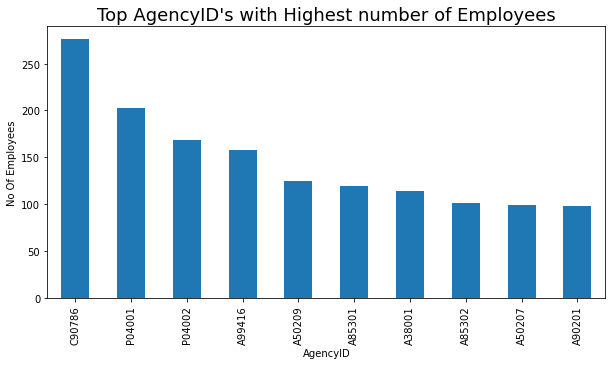

In [23]:
#Top 10 Jobs that has highest number of employees on the basis of agencyid
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])[' Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top AgencyID's with Highest number of Employees",fontsize=18)
plt.show()

In [24]:
# A small Application
print("Use M for Mayor's Office\nUse F for FIN Admin & Budgets\nUse C for Council Services\nUse L for Law Department\nUse MR for MR Cable & comm\nUse FD for Fire Department\nUse CC for Computer controller\nUse CA for Computer Audits\nUse HR for Human Resources\nUse S for States Attormey's Office\n")

a= input("Enter which job you are interested in? ")

if (a=="M"):
    print("Your expected salary is around 1 lac dollars")
elif(a=="F"):
    print("Your expected salary is around 75000 dollars")
elif(a=="C"):
    print("Your expected salary is around 72000 dollars")
elif(a=="L"):
    print("Your expected salary is around 70000 dollars")
elif(a=="MR"):
    print("Your expected salary is around 68000 dollars")
elif(a=="FD"):
    print("Your expected salary is around 68000 dollars")
elif(a=="CC"):
    print("Your expected salary is around 65000 dollars")
elif(a=="CA"):
    print("Your expected salary is around 65000 dollars")
elif(a=="HR"):
    print("Your expected salary is around 62000 dollars")
elif(a=="S"):
    print("Your expected salary is around 60000 dollars")
else:
    print("Invalid input")

Use M for Mayor's Office
Use F for FIN Admin & Budgets
Use C for Council Services
Use L for Law Department
Use MR for MR Cable & comm
Use FD for Fire Department
Use CC for Computer controller
Use CA for Computer Audits
Use HR for Human Resources
Use S for States Attormey's Office

Enter which job you are interested in? HR
Your expected salary is around 62000 dollars
